In [1]:
# Example 2: Two layer neural network
# 2.1 Loading the reuired libraries
import tensorflow as tf
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# 2.2 Defining the Batch size, input dimension, hidden dimension and number of classes
N,D,H,C=64,1000,100,10

In [4]:
# 2.3 Defining the placeholder for tensors (Can't be evaluated; must be fed through feed_dict during training)
x=tf.placeholder(tf.float32,shape=[None,D])
y=tf.placeholder(tf.float32,shape=[None,C])
print(x)

Tensor("Placeholder:0", shape=(?, 1000), dtype=float32)


In [5]:
# 2.4 Defining the Variables; Weight matrices w1 and w2
w1=tf.Variable(1e-3*np.random.randn(D,H).astype(np.float32),name="w1")
w2=tf.Variable(1e-3*np.random.randn(H,C).astype(np.float32),name="w2")

In [6]:
# 2.5 Building inference graph: Feedforward algorithm
with tf.name_scope('scores') as scope:
    a=tf.matmul(x,w1)
    a_relu=tf.nn.relu(a)
    scores=tf.matmul(a_relu,w2)
    
with tf.name_scope('loss') as scope:
    probs=tf.nn.softmax(scores)
    loss=-tf.reduce_sum(y*tf.log(probs))

# Creating summaries for loss and weights for tensorboard
loss_summary=tf.summary.scalar('loss',loss)
w1_hist=tf.summary.histogram('w1',w1)
w2_hist=tf.summary.histogram('w2',w2)

In [7]:
# 2.6 Building training graph
learning_rate=1e-2
optimizer=tf.train.GradientDescentOptimizer(learning_rate)
train=optimizer.minimize(loss)

In [8]:
# 2.7 Simulating data matrices
xx=np.random.randn(N,D).astype(np.float32)
yy=np.zeros((N,C)).astype(np.float32)
yy[np.arange(N),np.random.randint(C,size=N)]=1
yy

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

147.36372
147.30164
147.19257
146.90714
146.09616
143.66139
136.22098
116.16955
87.17467
59.885845
39.558414
26.7257
13.969757
7.697636
4.9880753
4.0516925
3.6386604
3.39081
3.2214913
3.0977547
3.0030158
2.9276881
2.8665843
2.8160112
2.7733884
2.7370365
2.705721
2.6784742
2.6544425
2.633163
2.6142025
2.5971875
2.5818548
2.5679622
2.5553188
2.5437703
2.533176
2.5234296
2.514432
2.506102
2.4983702
2.4911778
2.4844656
2.4781916
2.4723122
2.4668
2.4616234
2.4567363
2.4521222
2.4477649
2.443654
2.4397573
2.4360468
2.4325202
2.4291759
2.4260716
2.4230201
2.4201102
2.4173336
2.4146907
2.412145
2.4097059
2.4073856
2.4051588
2.4030037
2.4009397
2.398946
2.3970268
2.3951805
2.3934019
2.3916848
2.3900292
2.3884294
2.3868864
2.3853943
2.3839512
2.382554
2.3812041
2.3798935
2.3786266
2.377404
2.3762252
2.3750696
2.3739455
2.3728538
2.3717935
2.3707623
2.369761
2.368788
2.3678398
2.3669157
2.366018
2.3651423
2.3642917
2.363464
2.3626664
2.361877
2.3611064
2.3603551
2.3596225


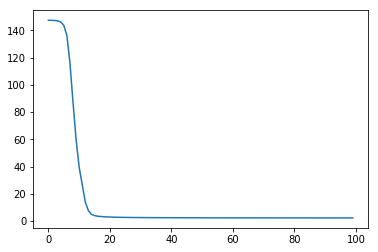

In [9]:
# 2.8 Perform training and creating logs for Tensorboard
losses=[]
with tf.Session() as sess:
    merged=tf.summary.merge_all()
    writer=tf.summary.FileWriter('fc_logs',sess.graph)
    sess.run(tf.global_variables_initializer())
    
    for t in xrange(100):
        summary_str,_,loss_value=sess.run([merged,train,loss],feed_dict={x:xx,y:yy})
        losses.append(loss_value)
        writer.add_summary(summary_str,t)
        print loss_value
    plt.plot(losses)